In [1]:
cd TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
from BB2tile import *
# from dataset import Dataset

Populating the interactive namespace from numpy and matplotlib


Number of non-overlapping tile regions (M) :  26
Number of workers (N) :  10
Check that there are no all-zero rows in indicator matrix: True


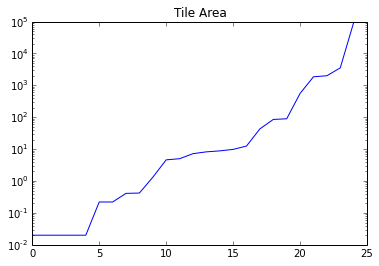

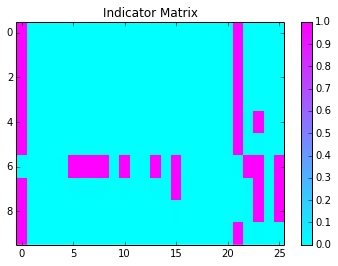

In [4]:
object_id = 40
tiles, objIndicatorMat = createObjIndicatorMatrix(object_id,sampleNworkers=10,PRINT=True)
sanity_check( objIndicatorMat)

Number of non-overlapping tile regions (M) :  130
Number of workers (N) :  10
Check that there are no all-zero rows in indicator matrix: True


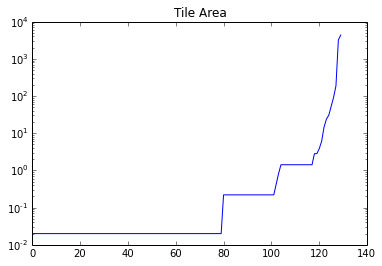

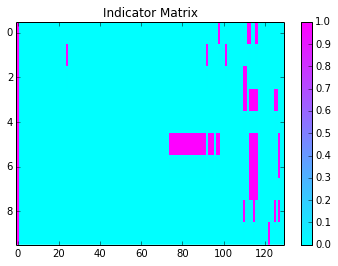

In [5]:
object_id =12
tiles, objIndicatorMat = createObjIndicatorMatrix(object_id,sampleNworkers=10,PRINT=True)
sanity_check( objIndicatorMat)

In [9]:
def plot_tile_i(tiles,i):
    plot_coords(Polygon(zip(tiles[i][:,1],tiles[i][:,0])))

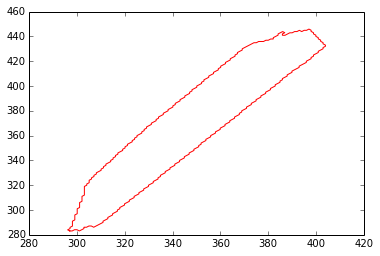

In [10]:
plot_tile_i(tiles,0)

In [3]:
img_info,object_tbl,bb_info,hit_info = load_info()
obj_lst = list(set(object_tbl.object_id))
my_BBG  = pd.read_csv("my_ground_truth.csv")

- Sampling Ji responses

In [6]:
object_id = 40
tiles, objIndicatorMat = createObjIndicatorMatrix(object_id,sampleNworkers=10,PRINT=True)

Number of non-overlapping tile regions (M) :  26
Number of workers (N) :  10


In [28]:
from tqdm import tqdm 

In [29]:
all_sampleN_lst=[]
for sampleN in tqdm(range(0,41,5)[1:]):
    sampleN_lst=[]
    for object_id in obj_lst:     
        tiles, objIndicatorMat = createObjIndicatorMatrix(object_id,sampleNworkers=sampleN,PRINT=False)
        sampleN_lst.append(len(tiles))
    all_sampleN_lst.append(sampleN_lst)

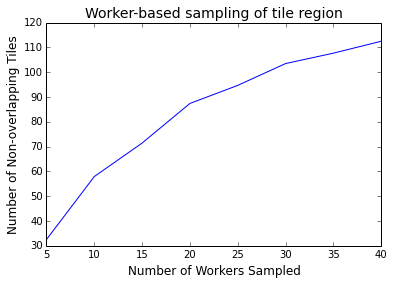

In [32]:
plt.title("Worker-based sampling of tile region",fontsize=14)
plt.xlabel("Number of Workers Sampled",fontsize=12)
plt.ylabel("Number of Non-overlapping Tiles",fontsize=12)
plt.plot(range(0,41,5)[1:],np.mean(all_sampleN_lst,axis=1))
plt.savefig("sampletile.pdf")

In [3]:
object_id = 40
tiles, objIndicatorMat = createObjIndicatorMatrix(object_id,sampleNworkers=20,PRINT=True)

Number of non-overlapping tile regions (M) :  27
Number of workers (N) :  20


In [5]:
Ta, La, ga, solutionLista = experiment_avg(objIndicatorMat)

Starting Average Experiment with T value 774.336
--------------------------
0 + 2 * log(var68.T * [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]) + -log(0.0) + -log(774.336) + 2 * log(var68.T * [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]) + -log(0.0) + -log(774.336) + 2 * log(var68.T * [[    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [    0.  ]
 [ 2004.22]
 [    0.  ]
 [ 1859.42]]) + -log(3863.64) + -log(774.336) + 2 * log(var68.T * [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0

In [17]:
N1,M = shape(objIndicatorMat)

In [11]:
shape(objIndicatorMat[-1])

(27,)

In [19]:
regions = objIndicatorMat[-1]

In [31]:
np.where(objIndicatorMat[:-1]!=0)

(array([ 2,  2, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 17, 17]),
 array([24, 26,  6,  7,  8,  9, 11, 14, 16, 23, 24, 26, 16, 24, 26, 24, 26]))

In [36]:
gammas = ga

The reason why we were getting inf in the log likelihood is because for some of the indicators, the whole indicator vector is zero, so then when you do the matmul, the argument in the log is zero, log(0)=error -->inf. Inituitvely, because each worker made a BB he must have at least 1 non-zero entry in his indicator, i.e his bounding box must contain at least one of his tiles, or small set of his tile. So that mean there is something wrong with the BB2Tile construction of the indicator matrix. 

In [39]:
gammas.T

matrix([[ -7.76818815e-03,   1.61914224e-01,  -4.22916425e-08,
          -4.30767920e-08,  -5.76193395e-07,  -4.03460469e-07,
           9.99535492e-01,   1.00001363e+00,   1.00002475e+00,
           1.00002475e+00,   4.68699136e-01,   1.00002475e+00,
          -7.81117464e-07,  -6.55493513e-07,   9.99953033e-01,
          -4.39801044e-05,   9.99512606e-01,  -3.40351807e-06,
           4.68699136e-01,   1.61914224e-01,  -6.71685207e-06,
          -2.77841160e-04,  -7.32579099e-03,   9.99330336e-01,
           5.54923308e-01,  -7.04583010e-06,   5.87079785e-01]])

In [37]:
f = 0
for i in range(M):
    indicators = objIndicatorMat[i]
    term = 2 * np.log(gammas.T * np.multiply(regions, indicators)) \
            - np.log(np.dot(regions, indicators)) - cvx.log(T)
    f = f + term 

ValueError: shapes (1,27) and (1,27) not aligned: 27 (dim 1) != 1 (dim 0)

In [5]:
Ta, La, ga, solutionLista = experiment_avg(objIndicatorMat)
Tm, Lm, gm, solutionListm = experiment_median(objIndicatorMat)
Tl, Ll, gl, solutionListl = experiment_local(1, objIndicatorMat)

Starting Average Experiment with T value 774.336
--------------------------
Starting Median Experiment with T value 0.0
--------------------------
Starting Local Search with T values between 1 and 200518.06
--------------------------


In [8]:
La

inf

In [50]:
#Exhaustive search is a bit buggy because convex solver yields likelihood as inf 
# Te, Le, ge, solutionListe = experiment_exhaustive(1, objIndicatorMat,step_size=500)

In [ ]:
tile_dataset = Dataset(tiles,objIndicatorMat,100)
solution = greedySearch(tile_dataset)
solution.printSolution()

In [ ]:
Compare with 

------------------------

In [4]:
object_id = 18
ground_truth_match = my_BBG[my_BBG.object_id==object_id]
BBG =  Polygon(zip(*process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])))
tiles, objIndicatorMat = createObjIndicatorMatrix(object_id)
T_true =BBG.area

In [8]:
Ta, La, solutionLista = experiment_avg(objIndicatorMat)
# Tm, Lm, solutionListm = experiment_median(objIndicatorMat)
# Tl, Ll, solutionListl = experiment_local(5000, objIndicatorMat)

NameError: name 'experiment_avg' is not defined

In [10]:
from shapely.ops import cascaded_union

In [11]:
def join_tiles(solutionList,tiles):
    return cascaded_union([Polygon(tiles[tidx]) for tidx in solutionList])

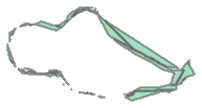

In [35]:
join_tiles(solutionLista,tiles)

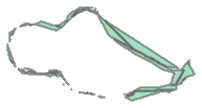

In [39]:
join_tiles(solutionListm,tiles)

# Plotting $\gamma$ probabilities for each tile

In [1]:
La

NameError: name 'La' is not defined